In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 3})
sns.set_style('whitegrid',
              {'grid.linestyle': ':', 'grid.color': 'red', 'axes.edgecolor': '0.5',
               'axes.linewidth': 1.2, 'legend.frameon': True})

import os

import pickle

In [2]:
npart = 1000
nturns = 20000

In [3]:
tune_range_qx = np.arange(18.55, 18.95 + 0.01, 0.01)
tune_range_qy = tune_range_qx

e_seed = 1

In [8]:
losses = np.zeros((len(tune_range_qx), len(tune_range_qy)))
std_x = np.zeros_like(losses)
std_y = np.zeros_like(losses)

for i, qx in enumerate(tune_range_qx):
    for j, qy in enumerate(tune_range_qy):
        qqx, qqy = int(np.round((qx%1) * 100)), int(np.round((qy%1) * 100))

        filename_error_table = "errors_{qqx}_{qqy}_{eseed:d}".format(
            qqx=qqx, qqy=qqy, eseed=e_seed)

        try:
            store = pickle.load(open('results/' + filename_error_table + '_summary.p', 'rb'))
        except FileNotFoundError:
            try:
                store = pickle.load(open('results_old/' + filename_error_table + '_summary.p', 'rb'))
            except FileNotFoundError:
                losses[i, j] = np.nan
                std_x[i, j] = np.nan
                std_y[i, j] = np.nan
                continue
        
        losses[i, j] = store['losses']
        std_x[i, j] = store['std_x']
        std_y[i, j] = store['std_y']

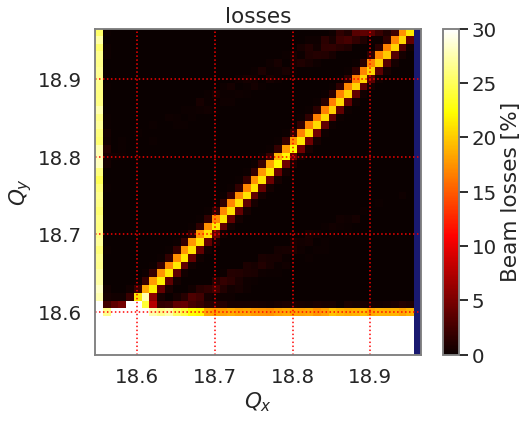

In [9]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=30,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed1_losses_30.pdf', bbox_inches='tight')

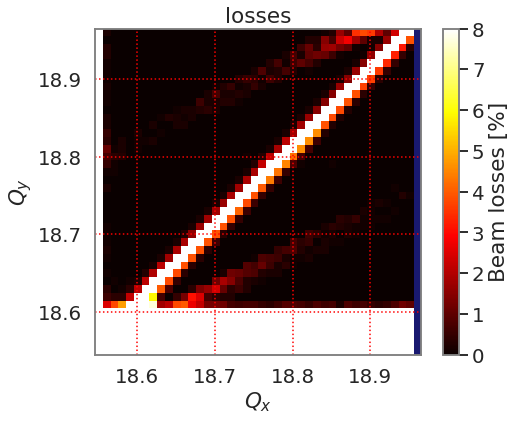

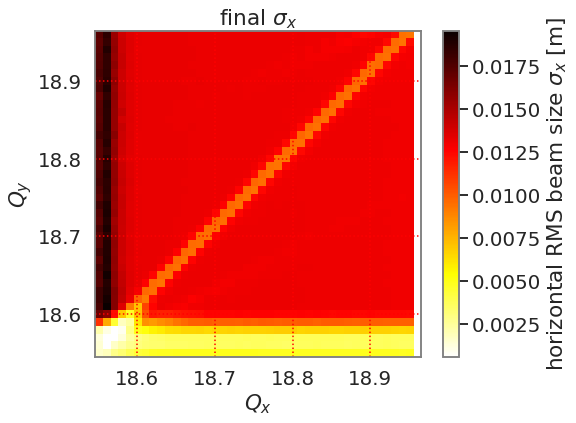

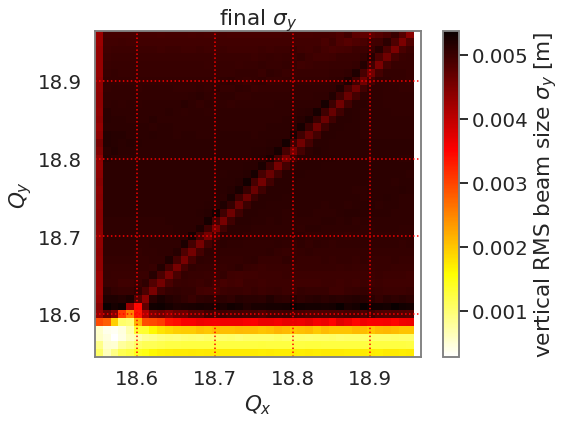

In [10]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=8,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed1_losses.pdf', bbox_inches='tight')

plt.figure(figsize=(8, 6))
plt.title('final $\sigma_x$')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(
    std_x.T, origin='lower', 
    extent=extent, cmap=plt.get_cmap('hot_r'))
cbar = plt.colorbar()
cbar.set_label('horizontal RMS beam size $\sigma_x$ [m]')
plt.savefig('tunescan_eseed1_sigx.pdf', bbox_inches='tight')

plt.figure(figsize=(8, 6))
plt.title('final $\sigma_y$')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(
    std_y.T, origin='lower', 
    extent=extent, cmap=plt.get_cmap('hot_r'))
cbar = plt.colorbar()
cbar.set_label('vertical RMS beam size $\sigma_y$ [m]')
plt.savefig('tunescan_eseed1_sigy.pdf', bbox_inches='tight')

In [11]:
qqx, qqy = np.meshgrid(tune_range_qx[:-1], tune_range_qy)

np.savetxt('results.dat', 
           np.vstack(
               (qqx.flatten(), 
                qqy.flatten(), 
                losses.T[:, :-1].flatten())
           ).T, fmt='%.2f', newline='\r\n', header='Qx\tQy\tSurvival', delimiter='\t')

# tunespread at $Q_x=18.95$ and $Q_y=18.93$

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

import seaborn as sns
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 3})
sns.set_style('whitegrid',
              {'grid.linestyle': ':', 'grid.color': 'red', 'axes.edgecolor': '0.5',
               'axes.linewidth': 1.2, 'legend.frameon': True})

import os
import pickle

import time

In [53]:
import PyNAFF as pnf

from tune_diagram import ResonanceLines

In [61]:
def get_tune(signal, turns=64):
    try:
        return pnf.naff(signal[:turns], turns, 1, 0 , False, window=1)[0, 1]
    except IndexError:
        return np.nan

In [56]:
!ls tunespread/results

errors_95_93_1_alive.npy	    errors_95_93_1_summary.p
errors_95_93_1_done		    errors_95_93_1_x.npy
errors_95_93_1_lost_at_element.npy  errors_95_93_1_y.npy
errors_95_93_1_lost_at_turn.npy


In [57]:
x = np.load('tunespread/results/errors_95_93_1_x.npy')
y = np.load('tunespread/results/errors_95_93_1_y.npy')

In [62]:
qx_i = np.apply_along_axis(get_tune, 1, x)
qy_i = np.apply_along_axis(get_tune, 1, y)

max. dQ_x from tune footprint: 0.096


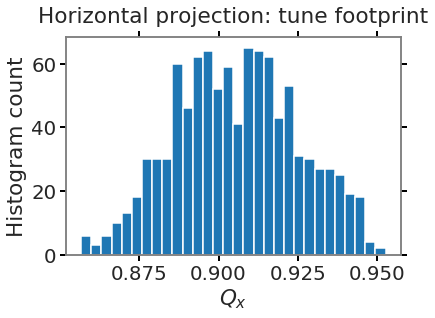

In [63]:
n, bins, _ = plt.hist(1 - qx_i, bins=30, label='128 first turns')
plt.xlabel("$Q_x$")
plt.ylabel('Histogram count')
plt.title('Horizontal projection: tune footprint', y=1.04)
plt.gca().tick_params(direction='out', length=6, width=2, color='black', reset=True, grid_linestyle='None')
plt.savefig('horizontalspectrum.png', dpi=150, bbox_inches='tight')

print ('max. dQ_x from tune footprint: {:.3f}'.format(bins[-1] - bins[0]))

max. dQ_y from tune footprint: 0.130


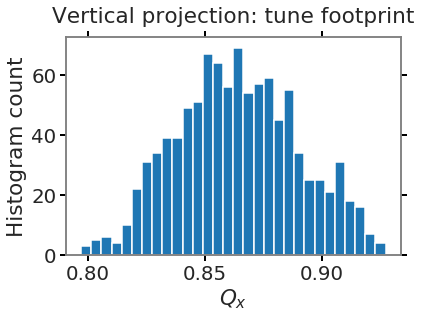

In [64]:
n, bins, _ = plt.hist(1 - qy_i, bins=30, label='128 first turns')
plt.xlabel("$Q_x$")
plt.ylabel('Histogram count')
plt.title('Vertical projection: tune footprint', y=1.04)
plt.gca().tick_params(direction='out', length=6, width=2, color='black', reset=True, grid_linestyle='None')
plt.savefig('verticalspectrum.png', dpi=150, bbox_inches='tight')

print ('max. dQ_y from tune footprint: {:.3f}'.format(bins[-1] - bins[0]))

In [65]:
Qx = 18.95
Qy = 18.93

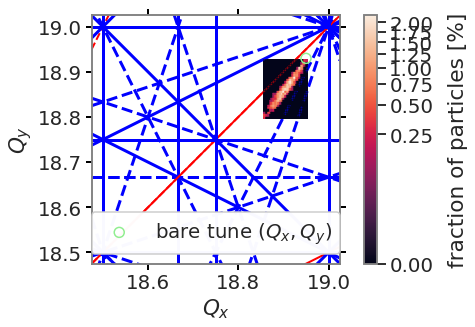

In [66]:
fig = plt.figure(figsize=(8,5)) 

extent_x = (np.floor(Qx) + 0.475, np.ceil(Qx) + 0.025)
extent_y = (np.floor(Qy) + 0.475, np.ceil(Qy) + 0.025)

resonances = ResonanceLines(extent_x, 
                            extent_y,
                            range(1, 4+1), 6) #1
resonances.plot_resonance(fig)
plt.gca().set_aspect('equal')

inc_tunes_x = np.floor(Qx) + 1 - np.abs(qx_i)[~np.isnan(qx_i)&~np.isnan(qy_i)]
inc_tunes_y = np.floor(Qy) + 1 - np.abs(qy_i)[~np.isnan(qy_i)&~np.isnan(qx_i)]

plt.hist2d(inc_tunes_x, inc_tunes_y, bins=25,
           zorder=3, alpha=0.5, 
           weights=np.ones_like(inc_tunes_x)/len(inc_tunes_x)*100,
           norm=mcolors.PowerNorm(0.3))
plt.hist2d(inc_tunes_x, inc_tunes_y, bins=25, 
           weights=np.ones_like(inc_tunes_x)/len(inc_tunes_x)*100,
           norm=mcolors.PowerNorm(0.3))
cbar = plt.colorbar()
cbar.set_label('fraction of particles [%]', labelpad=15)

plt.xlim(extent_x)
plt.ylim(extent_y)

plt.scatter(Qx, Qy, color='lightgreen', marker='o', facecolor='None', 
            linestyle='None', s=100, zorder=13, label=r"bare tune $(Q_x,Q_y)$")
plt.legend(loc=8, framealpha=0.98)

plt.gca().tick_params(direction='out', length=6, width=2, color='black', reset=True)
plt.grid(False)

plt.tight_layout()
plt.savefig('tunespread.png', dpi=150, bbox_inches='tight')

In [9]:
import os, sys

In [12]:
import tunespread.SIS100_tunescan_noerrors_SC_openCL as s

PyHEADTAIL v1.13.5





In [13]:
r = s.Runner()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.05.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2019.06.07               +
  + Execution date: 2020.01.13 15:12:18      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [14]:
twiss = r.setup_madx(r.madx, '', with_errors=False)

START MATCHING

number of sequences: 1
sequence name: sis100ring
number of variables:    2
user given constraints: 2
total constraints:      2

START LMDIF:

Initial Penalty Function =   0.22295711E+01


call:       4   Penalty function =   0.36156756E-04
call:       7   Penalty function =   0.18645887E-10
 ++++++++++ LMDIF ended: converged successfully
call:       7   Penalty function =   0.18645887E-10

MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------
Global constraint:         q1           4     1.89500000E+01     1.89500000E+01     9.79252639E-14
Global constraint:         q2           4     1.89300000E+01     1.89299996E+01     1.85479620E-11


Final Penalty Function =   1.86458872e-11





Variable                 Final Value  Initial Value Lower Limit  Upper Limit 
------------------------------------------------------------

In [15]:
pyht_beam = r.setup_pyheadtail_particles(twiss)

In [35]:
pyht_beam.sigma_z()

14.400931906496982

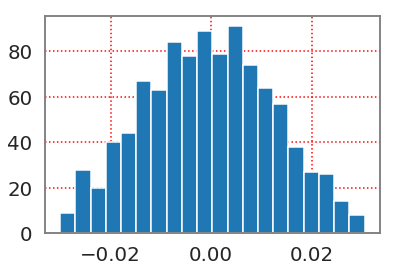

In [32]:
plt.hist(pyht_beam.x, bins=20);

In [47]:
s.pysixtrack

<module 'pysixtrack' from '/home/HPC/oeftiger/aoeftiger/pysixtrack/pysixtrack/__init__.py'>

In [49]:
!cd /home/HPC/oeftiger/aoeftiger/pysixtrack/ && git log | head -15

commit c6e17f35b2f56e72bd65105907bd1bf5a8dcfc5f
Merge: a5079d5 a1c73d9
Author: Adrian Oeftiger <a.oeftiger@gmx.net>
Date:   Mon Jan 13 12:02:32 2020 +0100

    Merge branch 'master' of https://github.com/sixtrack/pysixtrack

commit a1c73d9578a20e404dff54e1330aebe77eb763d5
Merge: 1d8f5db 4ce2927
Author: Riccardo De Maria <riccardodemaria@gmail.com>
Date:   Wed Jan 8 17:48:29 2020 +0100

    Merge pull request #35 from hannes-bartosik/master
    
    Add Hannes' beta fix in space charge


In [46]:
s.pyst

<module 'sixtracklib' from '/home/HPC/oeftiger/aoeftiger/sixtracklib_dev/python/sixtracklib/__init__.py'>